In [3]:

import requests
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from scipy.stats import multivariate_normal, matrix_normal
import networkx as nx
import yfinance as yf
import sys
sys.path.insert(0, 'C:/Users/ragna/Documents/Code/DyGraph')
sys.path.insert(0, 'C:/Users/ragna/Documents/Code/DyGraph/src')
import CovReg as cr
import DyGraph as dg
import CovReg as cr
import port_measures as pm
import matplotlib.pyplot as plt
import tqdm
import scipy
from scipy.optimize import minimize
from sklearn import linear_model

from sklearn.metrics.pairwise import rbf_kernel
import pickle


Code to analyze the synthetic experiments of the covariance regression models.

# Graph CovReg everything unknown

In [4]:
with open(f'data_sim/cov_all_unknownr6_d6.pkl', 'rb') as handle:
    all_unknown_r6_d6 = pickle.load(handle)
all_unknown_r6_d6.keys()

dict_keys(['alphas', 'ns', 'tol', 'Ys_true', 'As_true', 'Bs_true', 'Psis_true', 'Fs_true', 'As', 'Bs', 'Psis', 'Fs', 'times', 'omega', 'beta', 'r', 'd'])

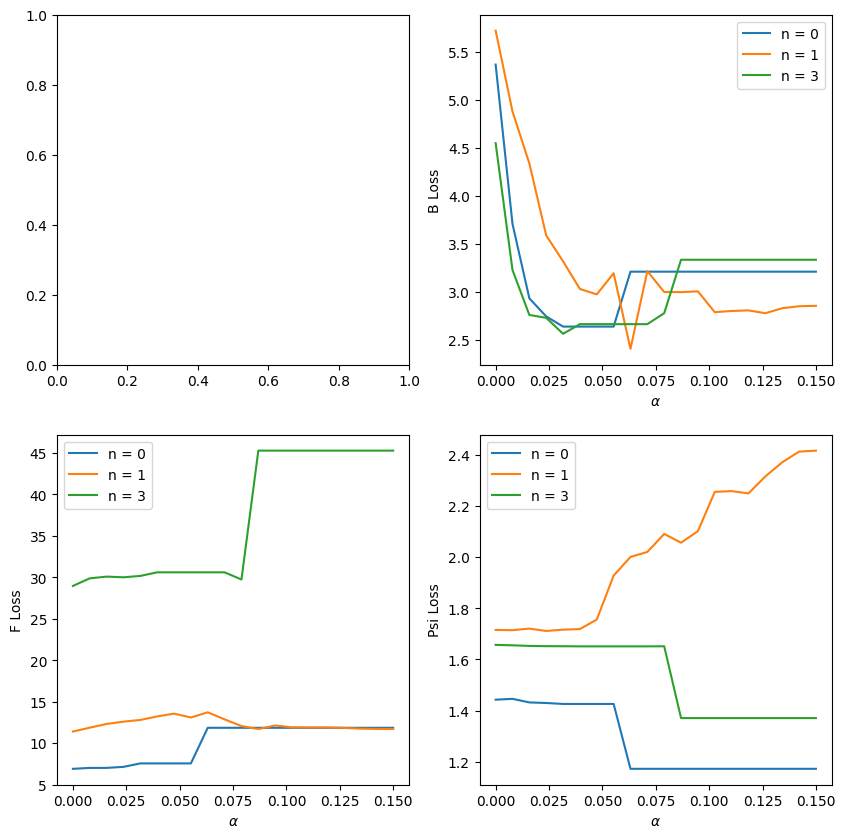

In [6]:


fig, axs = plt.subplots(2,2, figsize = (10,10))


for n_cnt in [0,1,3]:


    #A_loss = [np.linalg.norm(np.abs(all_unknown_r6_d6['As'][n_cnt][a_cnt]) - np.abs(all_unknown_r6_d6['As_true'][n_cnt])) for a_cnt in range(len(all_unknown_r6_d6['alphas']))]
    B_loss = [np.linalg.norm(np.abs(all_unknown_r6_d6['Bs'][n_cnt][a_cnt]) - np.abs(all_unknown_r6_d6['Bs_true'][n_cnt])) for a_cnt in range(len(all_unknown_r6_d6['alphas']))]
    F_loss = [np.linalg.norm(np.abs(all_unknown_r6_d6['Fs'][n_cnt][a_cnt]) - np.abs(all_unknown_r6_d6['Fs_true'][n_cnt])) for a_cnt in range(len(all_unknown_r6_d6['alphas']))]
    Psi_loss = [np.linalg.norm(np.abs(all_unknown_r6_d6['Psis'][n_cnt][a_cnt]) - np.abs(all_unknown_r6_d6['Psis_true'][n_cnt])) for a_cnt in range(len(all_unknown_r6_d6['alphas']))]

    # axs[0,0].plot(all_unknown_r6_d6['alphas'], A_loss, label = f'n = {n_cnt}')
    # axs[0,0].set_ylabel('A Loss')
    # axs[0,0].set_xlabel(r'$\alpha$')
    # axs[0,0].legend()

    axs[0,1].plot(all_unknown_r6_d6['alphas'], B_loss, label = f'n = {n_cnt}')
    axs[0,1].set_ylabel('B Loss')
    axs[0,1].set_xlabel(r'$\alpha$')
    axs[0,1].legend()

    axs[1,0].plot(all_unknown_r6_d6['alphas'], F_loss, label = f'n = {n_cnt}')
    axs[1,0].set_ylabel('F Loss')
    axs[1,0].set_xlabel(r'$\alpha$')
    axs[1,0].legend()

    axs[1,1].plot(all_unknown_r6_d6['alphas'], Psi_loss, label = f'n = {n_cnt}')
    axs[1,1].set_ylabel('Psi Loss')
    axs[1,1].set_xlabel(r'$\alpha$')
    axs[1,1].legend()





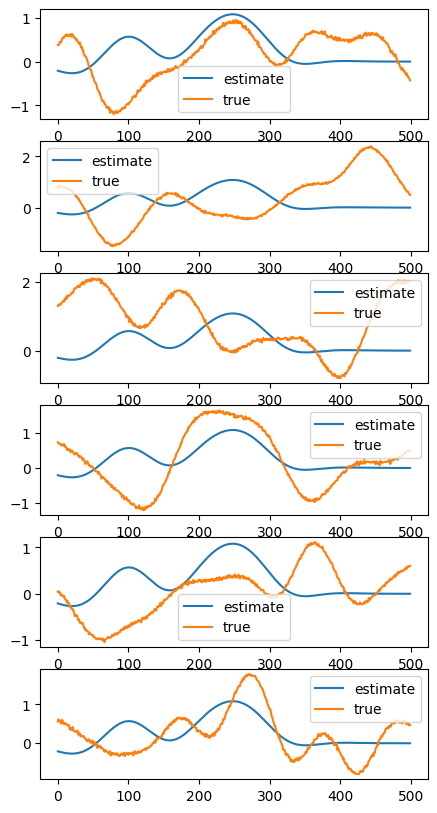

In [41]:
fig, ax = plt.subplots(6,1, figsize = (5, 10))

for i in range(all_unknown_r6_d6['Fs'][3][10].shape[1]):


    ax[i].plot(all_unknown_r6_d6['Fs'][3][10][:,i], label = 'estimate')
    ax[i].plot(all_unknown_r6_d6['Fs_true'][3][:,i], label = 'true')
    ax[i].legend()


For the coefficient matrices, we see that introducing the lasso is beneficial. While it is not beneficial for F, but not necessarily so much worse.

Examples of estimated latent processes


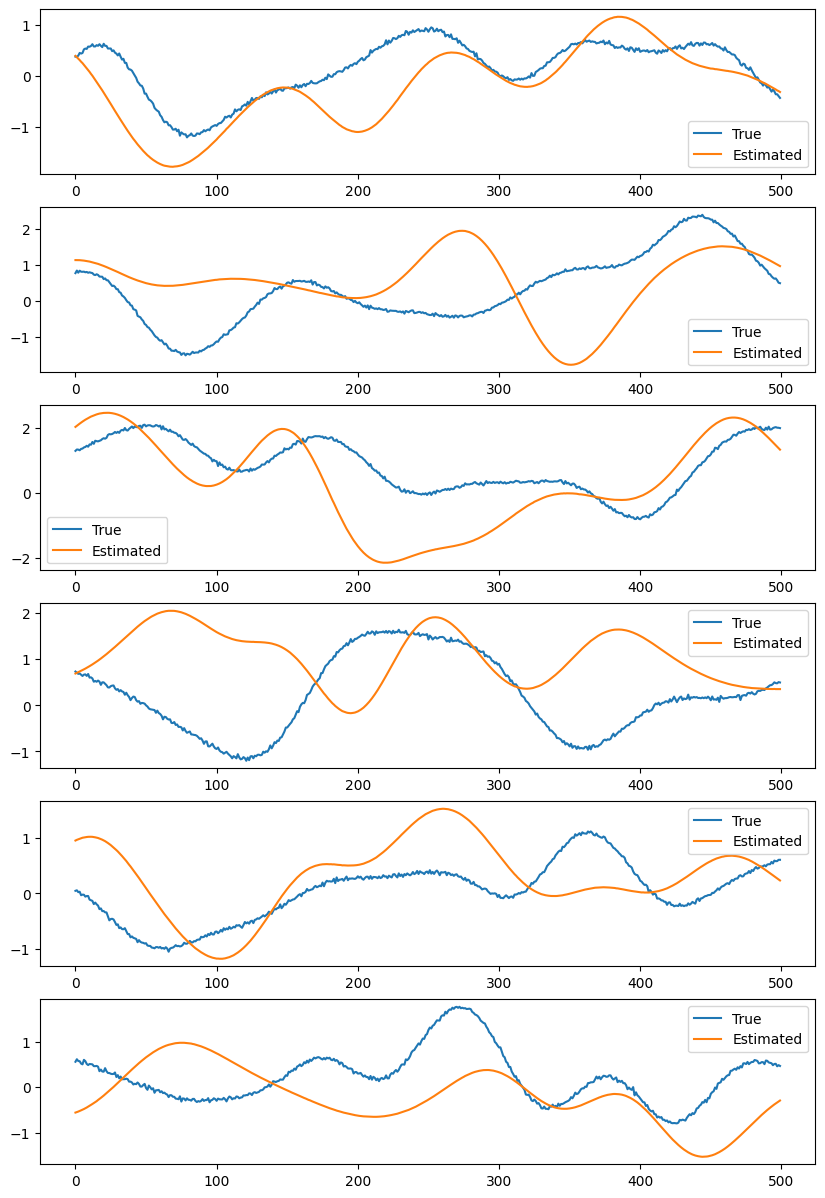

In [35]:
fig, ax = plt.subplots(6,1, figsize = (10,15))

n_cnt = 3
a_cnt = 1
for i in range(all_unknown_r6_d6['r']):
    ax[i].plot(all_unknown_r6_d6['Fs_true'][n_cnt][:,i], label = 'True')
    ax[i].plot(all_unknown_r6_d6['Fs'][n_cnt][a_cnt][:,i], label = 'Estimated')
    ax[i].legend()


# Multiple start benefits

Look at benefit of multiple start

In [36]:
with open(f'../data/covreg/multi_start_r6_d6_a025_n500.pkl', 'rb') as handle:
    multi_start = pickle.load(handle)
multi_start.keys()

dict_keys(['alphas', 'ns', 'tol', 'F_error', 'B_error', 'A_error', 'Psi_error', 'obj', 'times', 'omega', 'beta', 'r', 'd'])

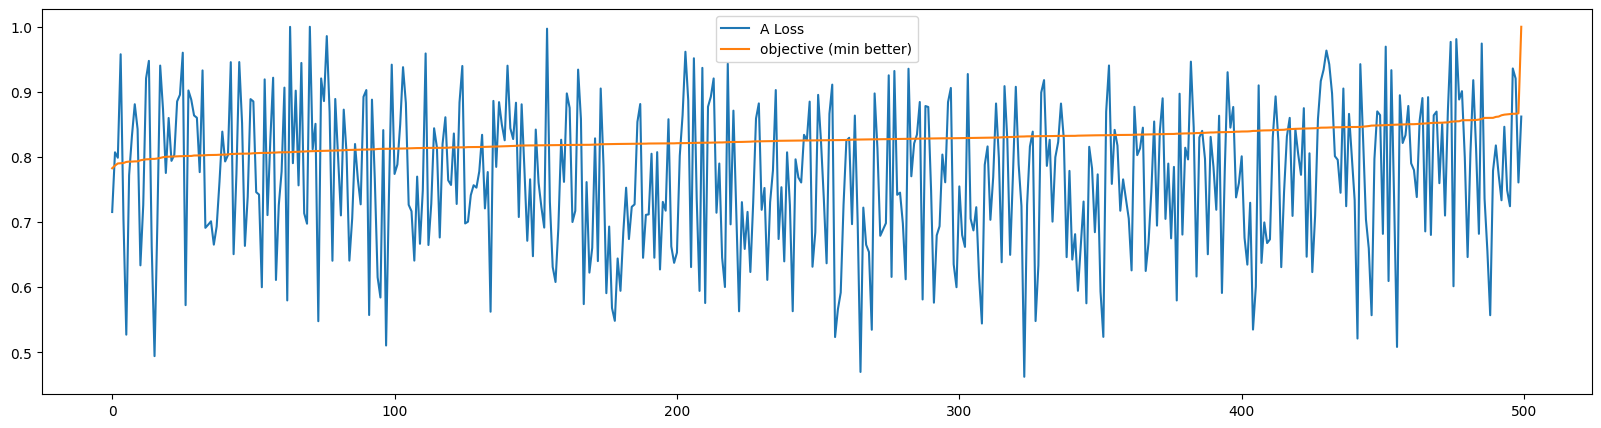

In [57]:
fig, ax = plt.subplots(1,1, figsize = (20,5))
idexes = np.argsort(multi_start['obj']/np.max(multi_start['obj']))
#ax.plot((multi_start['F_error']/np.max(multi_start['F_error']))[idexes], label = 'F Loss')
ax.plot((multi_start['A_error']/np.max(multi_start['A_error']))[idexes], label = 'A Loss')
# ax.plot((multi_start['B_error']/np.max(multi_start['B_error']))[idexes], label = 'B Loss')
ax.plot((multi_start['obj']/np.max(multi_start['obj']))[idexes], label = 'objective (min better)')
ax.legend()
# ax[0,0].plot(multi_start['A_error'])
# ax[0,1].plot(multi_start['B_error'])

# ax[0,0].plot(multi_start['A_error'])
# ax[0,1].plot(multi_start['B_error'])